In [ ]:
"""
New York City AirBnB
TASKS
1. What can we learn about different areas?
2. What can we learn from predictions? For example, location and reviews, location and price.
3. Which areas are the busiest and why?
4. Is there noticeable difference of traffic among different areas and what could be the reason for it?
"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Loading the datasets 
df = pd.read_csv('Documents/archive (1)/archive (2)/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [42]:
# Checking for missing values.
df.isnull().sum()
df = df.dropna()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [6]:
# Checking for and dropping duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
# What can we learn about different neighborhood areas?
areas = df.groupby('neighbourhood_group', as_index=False).agg({'price':'mean', 'reviews_per_month':'mean'})
areas

,neighbourhood_group,price,reviews_per_month
0,Bronx,79.558857,1.838549
1,Brooklyn,121.463289,1.283356
2,Manhattan,180.071596,1.271756
3,Queens,95.783683,1.941923
4,Staten Island,89.964968,1.872580


Text(0.5, 0, 'Neighbourhood Group')

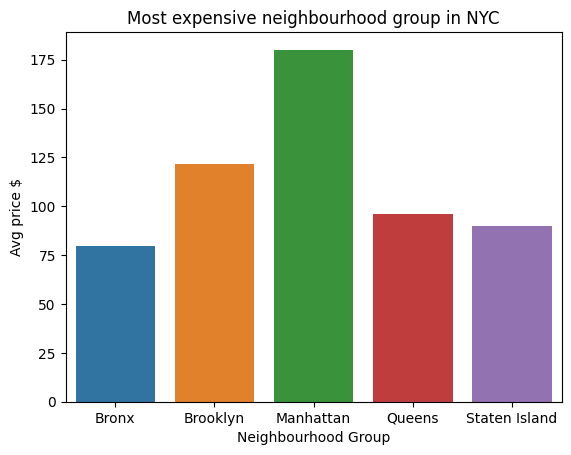

In [57]:
most_expensive = sns.barplot(x='neighbourhood_group', y='price', data=areas)
most_expensive.set_title('Most expensive neighbourhood group in NYC')
most_expensive.set_ylabel('Avg price $')
most_expensive.set_xlabel('Neighbourhood Group')


Text(0.5, 0, 'Neighbourhood Group')

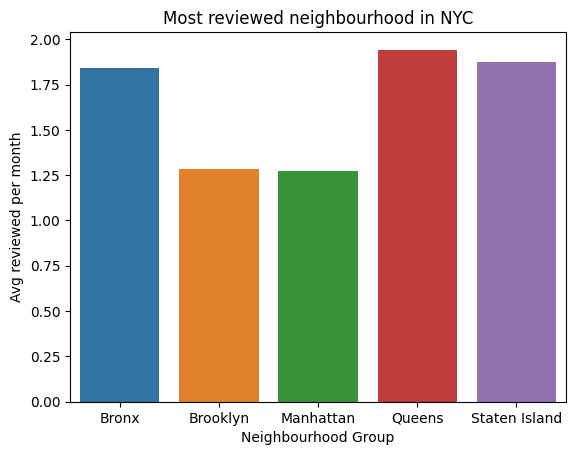

In [52]:
most_reviewed = sns.barplot(x='neighbourhood_group', y='reviews_per_month', data=areas)
most_reviewed.set_title('Most reviewed neighbourhood in NYC')
most_reviewed.set_ylabel('Avg reviewed per month')
most_reviewed.set_xlabel('Neighbourhood Group')

In [43]:
#which areas are the busiest and why? 
busiest_areas = df.groupby('neighbourhood_group', as_index=False)['host_id'].count()
busiest_areas

,neighbourhood_group,host_id
0,Bronx,875
1,Brooklyn,16439
2,Manhattan,16621
3,Queens,4572
4,Staten Island,314


Text(0, 0.5, 'Neighbourhood Group')

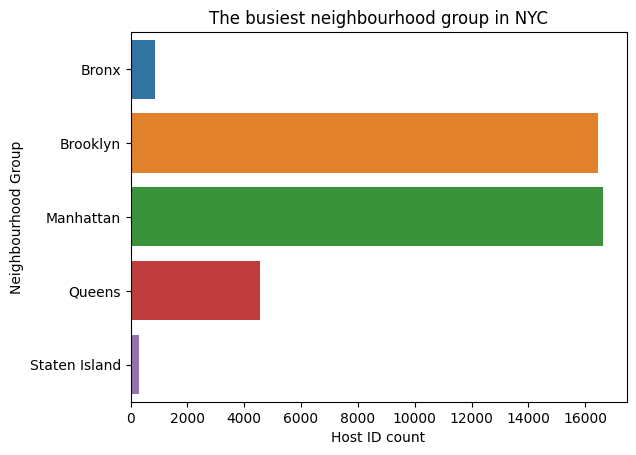

In [53]:
busiest_neighbourhood = sns.barplot(y='neighbourhood_group', x='host_id', data=busiest_areas, orient='h')
busiest_neighbourhood.set_title('The busiest neighbourhood group in NYC')
busiest_neighbourhood.set_xlabel('Host ID count')
busiest_neighbourhood.set_ylabel('Neighbourhood Group')

In [14]:
areas.to_csv('areas.txt')
busiest_areas.to_csv('busiest_areas.txt')

In [19]:
room_types = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)['host_id'].count()
room_types = room_types.sort_values(by = 'host_id', ascending= False)
room_types

,neighbourhood_group,room_type,host_id
6,Manhattan,Entire home/apt,9962
3,Brooklyn,Entire home/apt,8159
4,Brooklyn,Private room,7990
7,Manhattan,Private room,6303
10,Queens,Private room,2678
9,Queens,Entire home/apt,1742
1,Bronx,Private room,524
8,Manhattan,Shared room,356
0,Bronx,Entire home/apt,308
5,Brooklyn,Shared room,290


In [28]:
room_types.to_csv('room types.txt')

In [56]:
# Have the number of visitors increased through the years?
from datetime import datetime
df['last_review'] = pd.to_datetime(df['last_review'])
df['year'] = df['last_review'].dt.year
Number_of_visitors = df.groupby('year', as_index=False).agg({'host_id':'count', 'price':'sum'})
Number_of_visitors 

,year,host_id,price
0,2011,7,1183
1,2012,25,3953
2,2013,48,12298
3,2014,199,31905
4,2015,1388,218301
5,2016,2703,410380
6,2017,3203,433859
7,2018,6047,840388
8,2019,25201,3573224


Text(0.5, 1.0, 'Number of visitors through the year 2011 to 2019')

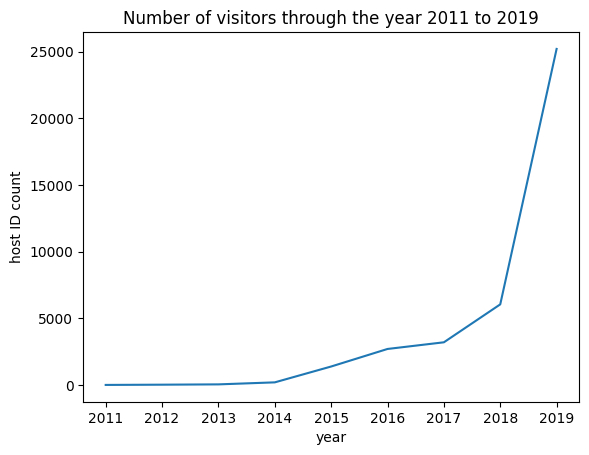

In [50]:
number_of_visitors = sns.lineplot(x='year', y='host_id', data=Number_of_visitors)
number_of_visitors.set_ylabel('host ID count')
number_of_visitors.set_title('Number of visitors through the year 2011 to 2019')

In [61]:
Number_of_visitors.to_csv('number of visitors.txt')
num_of_visitors.to_csv('numb of visitors.txt')

In [ ]:
"""CONCLUSION
1. What can we learn from predictions ex. location and price, location and reviews?
It can be seen from the chart that the most expensive neighbourhood groups are Manhattan and Brooklyn and they are the most busiest. Also, the best 
reviewed areas are Queens, Bronx, Staten Island. However, they are less patronized compared to expensive areas. This shows that customers prefer 
high priced neighbourhood groups than best reviewed ones.

2. Is there any noticeable difference  of traffic among different areas and what could be the reason for that?
There is noticeable difference of traffic among different areas: Manhattan is the most busiest area for the reason that many of the top attraction 
are located there. For example, Empire State Building or the Statue of Liberty, Times Square, Central Park. Furthermore, it is surrounded by some of 
top museums in New York City. Brooklyn, it is filled with art, culture, entertainment, food and more, It attracts everyone, mostly families and couples.
It is near places like Brooklyn Botanical Garden, Prospect Park, and Brooklyn Museum. Queens is near to Brooklyn and it connects to Manhattan 
and Bronx. It is home to many parks and museums. It can be concluded that the busiest neighbourhood areas are close to attraction centers and popular
places in New York City, which might be the reason why they are the busiest among the others.


Data source: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
Data visualization: https://public.tableau.com/app/profile/morakinyo.oluwabukunmi/viz/NewYorkCityAirBnB_16967239353260/AirBnBNYC?publish=yes 
"""